<a href="https://colab.research.google.com/github/HienDT27/Rabbit-Challenge/blob/master/%E3%80%90%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92_Day_04%E3%80%914_3_keras_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

## Googleドライブのマウント

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [0]:
import sys
sys.path.append('/content/drive/My Drive/【E資格】深層学習/DNN_code')

# keras

## 線形回帰

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Generation: 10. 誤差 = 3.6942694
Generation: 20. 誤差 = 2.6541474
Generation: 30. 誤差 = 1.936122
Generation: 40. 誤差 = 1.4361179
Generation: 50. 誤差 = 1.0842767
Generation: 60. 誤差 = 0.8336293
Generation: 70. 誤差 = 0.65253085
Generation: 80. 誤差 = 0.5196039
Generation: 90. 誤差 = 0.4203563
Generation: 100. 誤差 = 0.3449212
Generation: 110. 誤差 = 0.28654325
Generation: 120. 誤差 = 0.24056612
Generation: 130. 誤差 = 0.20375313
Generation: 140. 誤差 = 0.17383154
Generation: 150. 誤差 = 0.14918631
Generation: 160. 誤差 = 0.12865375
Generation: 170. 誤差 = 0.11138248
Generation: 180. 誤差 = 0.09673886
Generation: 190. 誤差 = 0.08424299
Generation: 200. 誤差 = 0.07352474
Generation: 2

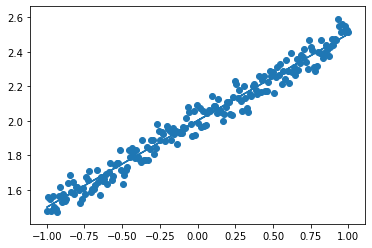

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)


import numpy as np
import matplotlib.pyplot as plt

iters_num = 1000
plot_interval = 10

x = np.linspace(-1, 1, 200)
np.random.shuffle(x)
d = 0.5 * x + 2 + np.random.normal(0, 0.05, (200,))

from keras.models import Sequential
from keras.layers import Dense

# モデルを作成
model = Sequential()
model.add(Dense(input_dim=1, units=1))
# model.add(Dense(input_dim=1, output_dim=1))

# モデルを表示
model.summary()

# モデルのコンパイル
model.compile(loss='mse', optimizer='sgd')

# train
for i in range(iters_num):
    loss = model.train_on_batch(x, d)
    if (i+1) % plot_interval == 0:
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss))

W, b = model.layers[0].get_weights()
print('W:', W)
print('b:', b)

y = model.predict(x)
plt.scatter(x, d)
plt.plot(x, y)
plt.show()

## 単純パーセプトロン 
OR回路

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  np.random.seed(0)をnp.random.seed(1)に変更
-  エポック数を100に変更
-  AND回路, XOR回路に変更
-  OR回路にしてバッチサイズを10に変更
-  エポック数を300に変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
 
# 乱数を固定値で初期化
np.random.seed(0)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )
 
# トレーニング
model.fit(X, T, epochs=30, batch_size=1)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print("TEST")
print(Y == T)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
4/4 [==============================] - 0s 35ms/step - loss: 0.4352
Epoch 2/30
4/4 [==============================] - 0s 3ms/step - loss: 0.4204
Epoch 3/30
4/4 [==============================] - 0s 3ms/step - loss: 0.4079
Epoch 4/30
4/4 [==============================] - 0s 3ms/step - loss: 0.3971
Epoch 5/30
4/4 [==============================] - 0s 3ms/step - loss: 0.3876
Epoch 6/30
4/4 [==============================] - 0s 3ms/step - loss: 0.3790
Epoch 7/30
4/4 [==============================] - 0s 3ms/st

### 【Try 01】OR回路のSeed変更
-  np.random.seed(0)をnp.random.seed(1)に変更

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
 
# 乱数を固定値で初期化
np.random.seed(1)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )
 
# トレーニング
model.fit(X, T, epochs=30, batch_size=1)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print("TEST")
print(Y == T)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
4/4 [==============================] - 0s 37ms/step - loss: 0.4976
Epoch 2/30
4/4 [==============================] - 0s 3ms/step - loss: 0.4734
Epoch 3/30
4/4 [==============================] - 0s 3ms/step - loss: 0.4528
Epoch 4/30
4/4 [==============================] - 0s 3ms/step - loss: 0.4364
Epoch 5/30
4/4 [==============================] - 0s 3ms/step - loss: 0.4231
Epoch 6/30
4/4 [==============================] - 0s 3ms/step - loss: 0.4115
Epoch 7/30
4/4 [==============================] - 0s 3ms/st

###【Try 02】Epochを100に変更

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
 
# 乱数を固定値で初期化
np.random.seed(1)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )
 
# トレーニング
model.fit(X, T, epochs=100, batch_size=1)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print("TEST")
print(Y == T)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 [==============================] - 0s 41ms/step - loss: 0.4976
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4734
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4528
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4364
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4231
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4115
Epoch 7/100
4/4 [==============================] - 0s

###【Try 03】AND回路に変更

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
 
# 乱数を固定値で初期化
np.random.seed(0)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
#T = np.array( [[0], [1], [1], [1]] )
T = np.array( [[0], [0], [0], [1]] )
 
# トレーニング
model.fit(X, T, epochs=30, batch_size=1)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print("TEST")
print(Y == T)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
4/4 [==============================] - 0s 45ms/step - loss: 0.8084
Epoch 2/30
4/4 [==============================] - 0s 3ms/step - loss: 0.7406
Epoch 3/30
4/4 [==============================] - 0s 3ms/step - loss: 0.6849
Epoch 4/30
4/4 [==============================] - 0s 4ms/step - loss: 0.6409
Epoch 5/30
4/4 [==============================] - 0s 3ms/step - loss: 0.6056
Epoch 6/30
4/4 [==============================] - 0s 3ms/step - loss: 0.5781
Epoch 7/30
4/4 [==============================] - 0s 3ms/st

###【Try 03】XOR回路に変更

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
 
# 乱数を固定値で初期化
np.random.seed(0)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
#T = np.array( [[0], [1], [1], [1]] )
#T = np.array( [[0], [0], [0], [1]] )
T = np.array( [[0], [1], [1], [0]] )

# トレーニング
model.fit(X, T, epochs=30, batch_size=1)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print("TEST")
print(Y == T)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
4/4 [==============================] - 0s 50ms/step - loss: 0.8427
Epoch 2/30
4/4 [==============================] - 0s 3ms/step - loss: 0.8205
Epoch 3/30
4/4 [==============================] - 0s 3ms/step - loss: 0.8049
Epoch 4/30
4/4 [==============================] - 0s 3ms/step - loss: 0.7924
Epoch 5/30
4/4 [==============================] - 0s 4ms/step - loss: 0.7822
Epoch 6/30
4/4 [==============================] - 0s 4ms/step - loss: 0.7754
Epoch 7/30
4/4 [==============================] - 0s 3ms/st

###【Try 04】OR回路にしてバッチサイズを10に変更

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
 
# 乱数を固定値で初期化
np.random.seed(0)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )
 
# トレーニング
model.fit(X, T, epochs=30, batch_size=10)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print("TEST")
print(Y == T)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_7 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
4/4 [==============================] - 0s 52ms/step - loss: 0.4326
Epoch 2/30
4/4 [==============================] - 0s 939us/step - loss: 0.4285
Epoch 3/30
4/4 [==============================] - 0s 946us/step - loss: 0.4246
Epoch 4/30
4/4 [==============================] - 0s 767us/step - loss: 0.4208
Epoch 5/30
4/4 [==============================] - 0s 717us/step - loss: 0.4172
Epoch 6/30
4/4 [==============================] - 0s 664us/step - loss: 0.4138
Epoch 7/30
4/4 [==============================] -

###【Try 05】エポック数を300に変更しよう

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# モジュール読み込み
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
 
# 乱数を固定値で初期化
np.random.seed(0)

# シグモイドの単純パーセプトロン作成
model = Sequential()
model.add(Dense(input_dim=2, units=1))
model.add(Activation('sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
 
# トレーニング用入力 X と正解データ T
X = np.array( [[0,0], [0,1], [1,0], [1,1]] )
T = np.array( [[0], [1], [1], [1]] )
 
# トレーニング
model.fit(X, T, epochs=300, batch_size=10)
 
# トレーニングの入力を流用して実際に分類
Y = model.predict_classes(X, batch_size=1)

print("TEST")
print(Y == T)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_8 (Activation)    (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
4/4 [==============================] - 0s 58ms/step - loss: 0.4326
Epoch 2/300
4/4 [==============================] - 0s 954us/step - loss: 0.4285
Epoch 3/300
4/4 [==============================] - 0s 929us/step - loss: 0.4246
Epoch 4/300
4/4 [==============================] - 0s 971us/step - loss: 0.4208
Epoch 5/300
4/4 [==============================] - 0s 1ms/step - loss: 0.4172
Epoch 6/300
4/4 [==============================] - 0s 1ms/step - loss: 0.4138
Epoch 7/300
4/4 [==============================

## 分類 (iris)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  中間層の活性関数をsigmoidに変更しよう
-  SGDをimportしoptimizerをSGD(lr=0.1)に変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 12)                60        
_________________________________________________________________
activation_17 (Activation)   (None, 12)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 39        
_________________________________________________________________
activation_18 (Activation)   (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 0s 4ms/step - loss: 1.1144 - acc: 0.2000 - val_loss: 0.9317 - val_acc: 0.4667
Epoch 2/20
120/120 [==============================] - 0s 658us/step - loss: 0.

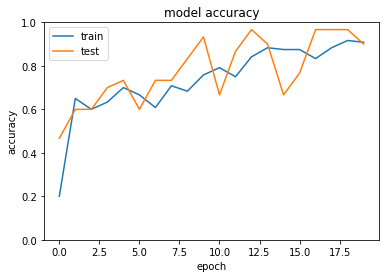

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
d = iris.target

# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, d_train, d_test = train_test_split(x, d, test_size=0.2)

from keras.models import Sequential
from keras.layers import Dense, Activation
# from keras.optimizers import SGD

#モデルの設定
model = Sequential()
model.add(Dense(12, input_dim=4))
model.add(Activation('relu'))
# model.add(Activation('sigmoid'))
model.add(Dense(3, input_dim=12))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=5, epochs=20, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1.0)
plt.show()


###【Try 01】中間層の活性関数をsigmoidに変更しよう

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 12)                60        
_________________________________________________________________
activation_19 (Activation)   (None, 12)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 39        
_________________________________________________________________
activation_20 (Activation)   (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 0s 4ms/step - loss: 1.1935 - acc: 0.3500 - val_loss: 1.1575 - val_acc: 0.2667
Epoch 2/20
120/120 [==============================] - 0s 492us/step - loss: 1.

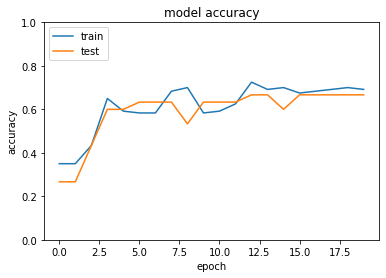

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
d = iris.target

# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, d_train, d_test = train_test_split(x, d, test_size=0.2)

from keras.models import Sequential
from keras.layers import Dense, Activation
# from keras.optimizers import SGD

#モデルの設定
model = Sequential()
model.add(Dense(12, input_dim=4))
#model.add(Activation('relu'))
model.add(Activation('sigmoid'))
model.add(Dense(3, input_dim=12))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=5, epochs=20, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1.0)
plt.show()

###【Try 02】SGDをimportしoptimizerをSGD(lr=0.1)に変更しよう

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 12)                60        
_________________________________________________________________
activation_21 (Activation)   (None, 12)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 3)                 39        
_________________________________________________________________
activation_22 (Activation)   (None, 3)                 0         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 0s 4ms/step - loss: 0.8838 - acc: 0.6167 - val_loss: 0.6776 - val_acc: 0.6333
Epoch 2/20
120/120 [==============================] - 0s 560us/step - loss: 0.

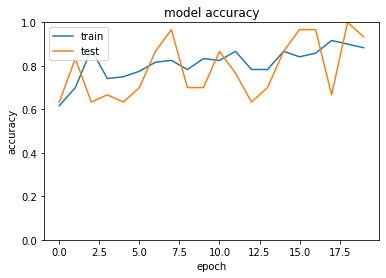

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
d = iris.target

# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, d_train, d_test = train_test_split(x, d, test_size=0.2)

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

#モデルの設定
model = Sequential()
model.add(Dense(12, input_dim=4))
model.add(Activation('relu'))
#model.add(Activation('sigmoid'))
model.add(Dense(3, input_dim=12))
model.add(Activation('softmax'))
model.summary()

#model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=SGD(lr=0.1), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=5, epochs=20, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim(0, 1.0)
plt.show()

## 分類 (mnist)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  load_mnistのone_hot_labelをFalseに変更しよう (error)
-  誤差関数をsparse_categorical_crossentropyに変更しよう
-  Adamの引数の値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 54

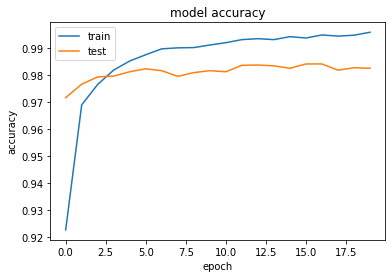

In [19]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# 必要なライブラリのインポート
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# モデル作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)
print('Test loss:', loss[0])
print('Test accuracy:', loss[1])
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

###【Try 01】load_mnistのone_hot_labelをFalseに変更しよう (error)

In [20]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# 必要なライブラリのインポート
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=False)

# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# モデル作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)
print('Test loss:', loss[0])
print('Test accuracy:', loss[1])
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


ValueError: ignored

###【Try 02】誤差関数をsparse_categorical_crossentropyに変更しよう

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 56

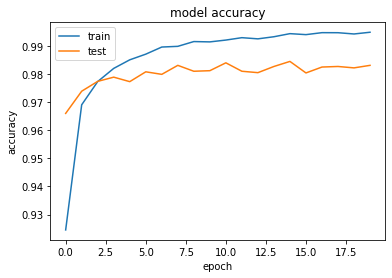

In [22]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# 必要なライブラリのインポート
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=False)

# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# モデル作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)
print('Test loss:', loss[0])
print('Test accuracy:', loss[1])
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

###【Try 03】Adamの引数の値を変更しよう

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 57

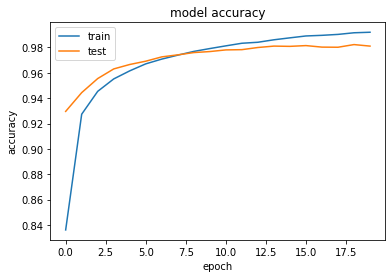

In [27]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# 必要なライブラリのインポート
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=False)

# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# モデル作成
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
              metrics=['accuracy'])

history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))
loss = model.evaluate(x_test, d_test, verbose=0)
print('Test loss:', loss[0])
print('Test accuracy:', loss[1])
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

## CNN分類 (mnist)
#### 実行に時間がかかるため割愛

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

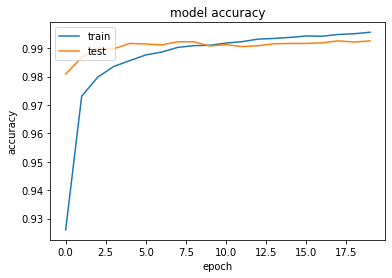

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

# 必要なライブラリのインポート
import keras
import matplotlib.pyplot as plt
from data.mnist import load_mnist

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)


# 行列として入力するための加工
batch_size = 128
num_classes = 10
epochs = 20

img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


# 必要なライブラリのインポート、最適化手法はAdamを使う
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(x_train, d_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, d_test))

#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.ylim(0, 1.0)
plt.show()

## cifar10
#### 実行に時間がかかるため割愛
データセット cifar10<br>
32x32ピクセルのカラー画像データ<br>
10種のラベル「飛行機、自動車、鳥、猫、鹿、犬、蛙、馬、船、トラック」<br>
トレーニングデータ数:50000, テストデータ数:10000<br>
http://www.cs.toronto.edu/~kriz/cifar.html

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

#CIFAR-10のデータセットのインポート
from keras.datasets import cifar10
(x_train, d_train), (x_test, d_test) = cifar10.load_data()

#CIFAR-10の正規化
from keras.utils import to_categorical
  
# 特徴量の正規化
x_train = x_train/255.
x_test = x_test/255.
 
# クラスラベルの1-hotベクトル化
d_train = to_categorical(d_train, 10)
d_test = to_categorical(d_test, 10)
 
# CNNの構築
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
import numpy as np
 
model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
 
# コンパイル
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
 
#訓練
history = model.fit(x_train, d_train, epochs=20)
 
# モデルの保存
model.save('./CIFAR-10.h5')
 
#評価 & 評価結果出力
print(model.evaluate(x_test, d_test))

Epoch 1/20
50000/50000 [==============================] - 12s 237us/step - loss: 1.5572 - acc: 0.4285
Epoch 2/20
50000/50000 [==============================] - 11s 224us/step - loss: 1.1500 - acc: 0.5922
Epoch 3/20
50000/50000 [==============================] - 11s 225us/step - loss: 1.0026 - acc: 0.6472
Epoch 4/20
50000/50000 [==============================] - 11s 228us/step - loss: 0.9168 - acc: 0.6782
Epoch 5/20
50000/50000 [==============================] - 11s 229us/step - loss: 0.8440 - acc: 0.7052
Epoch 6/20
50000/50000 [==============================] - 12s 232us/step - loss: 0.8023 - acc: 0.7189
Epoch 7/20
50000/50000 [==============================] - 11s 228us/step - loss: 0.7572 - acc: 0.7353
Epoch 8/20
50000/50000 [==============================] - 11s 224us/step - loss: 0.7309 - acc: 0.7418
Epoch 9/20
50000/50000 [==============================] - 11s 225us/step - loss: 0.7024 - acc: 0.7525
Epoch 10/20
50000/50000 [==============================] - 11s 228us/step - loss: 

## RNN

2進数足し算の予測

Keras RNNのドキュメント
https://keras.io/ja/layers/recurrent/#simplernn

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  RNNの出力ノード数を128に変更
-  RNNの出力活性化関数を sigmoid に変更
-  RNNの出力活性化関数を tanh に変更
-  最適化方法をadamに変更
-  RNNの入力 Dropout を0.5に設定
-  RNNの再帰 Dropout を0.3に設定
-  RNNのunrollをTrueに設定

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               # dropout=0.5,
               # recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_9 (Dense)              (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 37s 4ms/step - loss: 0.0825 - acc: 0.9092
Epoch 2/5
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0026 - acc: 1.0000
Epoch 3/5
10000/10000 [==============================] - 36s 4ms/step - loss: 7.7327e-04 - acc: 1.0000
Epoch 4/5
10000/10000 [==============================] - 36s 4ms/step - loss: 4.3752e-04 - acc: 1.0000
Epoch 5/5
10000/10000 [==============================] - 36s 4ms/step - loss: 3.0088e-04 - acc: 1.0000
Test loss: 

### 【Try 01】] RNNの出力ノード数を128に変更

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=128,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               # dropout=0.5,
               # recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 8, 128)            16768     
_________________________________________________________________
dense_10 (Dense)             (None, 8, 1)              129       
Total params: 16,897
Trainable params: 16,897
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 35s 4ms/step - loss: 0.0694 - acc: 0.9258
Epoch 2/5
10000/10000 [==============================] - 35s 4ms/step - loss: 0.0017 - acc: 1.0000
Epoch 3/5
10000/10000 [==============================] - 35s 3ms/step - loss: 6.5622e-04 - acc: 1.0000
Epoch 4/5
10000/10000 [==============================] - 35s 4ms/step - loss: 3.8880e-04 - acc: 1.0000
Epoch 5/5
10000/10000 [==============================] - 35s 3ms/step - loss: 2.7118e-04 - acc: 1.0000
Test 

###【Try 02】RNNの出力活性化関数を sigmoid に変更

In [28]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='sigmoid',
               # dropout=0.5,
               # recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_10 (SimpleRNN)    (None, 8, 16)             304       
_________________________________________________________________
dense_45 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 38s 4ms/step - loss: 0.2497 - acc: 0.5160
Epoch 2/5
10000/10000 [==============================] - 37s 4ms/step - loss: 0.2474 - acc: 0.5542
Epoch 3/5
10000/10000 [==============================] - 37s 4ms/step - loss: 0.2399 - acc: 0.6316
Epoch 4/5
10000/10000 [==============================] - 37s 4ms/step - loss: 0.2077 - acc: 0.7247
Epoch 5/5
10000/10000 [==============================] - 37s 4ms/step - loss: 0.1325 - acc: 0.8410
Test loss: 0.082935692

###【Try 03】RNNの出力活性化関数を tanh に変更

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='tanh',
               # dropout=0.5,
               # recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_12 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 40s 4ms/step - loss: 0.1097 - acc: 0.8375
Epoch 2/5
10000/10000 [==============================] - 41s 4ms/step - loss: 0.0016 - acc: 1.0000
Epoch 3/5
10000/10000 [==============================] - 40s 4ms/step - loss: 5.6286e-04 - acc: 1.0000
Epoch 4/5
10000/10000 [==============================] - 36s 4ms/step - loss: 3.2989e-04 - acc: 1.0000
Epoch 5/5
10000/10000 [==============================] - 36s 4ms/step - loss: 2.3008e-04 - acc: 1.0000
Test loss: 

###【Try 04】最適化方法をadamに変更

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               # dropout=0.5,
               # recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
#model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_13 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 39s 4ms/step - loss: 0.0897 - acc: 0.8976
Epoch 2/5
10000/10000 [==============================] - 38s 4ms/step - loss: 0.0018 - acc: 1.0000
Epoch 3/5
10000/10000 [==============================] - 39s 4ms/step - loss: 7.2939e-05 - acc: 1.0000
Epoch 4/5
10000/10000 [==============================] - 38s 4ms/step - loss: 4.5151e-06 - acc: 1.0000
Epoch 5/5
10000/10000 [==============================] - 38s 4ms/step - loss: 3.1585e-07 - acc: 1.0000
Test loss: 

###【Try 05】RNNの入力 Dropout を0.5に設定

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               dropout=0.5,
               # recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_14 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 36s 4ms/step - loss: 0.2352 - acc: 0.5796
Epoch 2/5
10000/10000 [==============================] - 36s 4ms/step - loss: 0.2157 - acc: 0.6247
Epoch 3/5
10000/10000 [==============================] - 36s 4ms/step - loss: 0.2098 - acc: 0.6300
Epoch 4/5
10000/10000 [==============================] - 35s 4ms/step - loss: 0.2080 - acc: 0.6280
Epoch 5/5
10000/10000 [==============================] - 36s 4ms/step - loss: 0.2056 - acc: 0.6297
Test loss: 0.209656911

###【Try 06】RNNの再帰 Dropout を0.3に設定

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               #dropout=0.5,
               recurrent_dropout=0.3,
               # unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_8 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_16 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 37s 4ms/step - loss: 0.1381 - acc: 0.8138
Epoch 2/5
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0317 - acc: 0.9781
Epoch 3/5
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0129 - acc: 0.9896
Epoch 4/5
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0111 - acc: 0.9891
Epoch 5/5
10000/10000 [==============================] - 36s 4ms/step - loss: 0.0082 - acc: 0.9915
Test loss: 0.016133127

###【Try 07】RNNのunrollをTrueに設定

In [0]:
import tensorflow as tf

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout,Activation
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import SGD
from keras.layers.recurrent import SimpleRNN, LSTM, GRU


# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)

# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)], dtype=np.uint8).T,axis=1)[:, ::-1]


# A, B初期化 (a + b = d)
a_int = np.random.randint(largest_number/2, size=20000)
a_bin = binary[a_int] # binary encoding
b_int = np.random.randint(largest_number/2, size=20000)
b_bin = binary[b_int] # binary encoding

x_int = []
x_bin = []
for i in range(10000):
    x_int.append(np.array([a_int[i], b_int[i]]).T)
    x_bin.append(np.array([a_bin[i], b_bin[i]]).T)

x_int_test = []
x_bin_test = []
for i in range(10001, 20000):
    x_int_test.append(np.array([a_int[i], b_int[i]]).T)
    x_bin_test.append(np.array([a_bin[i], b_bin[i]]).T)

x_int = np.array(x_int)
x_bin = np.array(x_bin)
x_int_test = np.array(x_int_test)
x_bin_test = np.array(x_bin_test)


# 正解データ
d_int = a_int + b_int
d_bin = binary[d_int][0:10000]
d_bin_test = binary[d_int][10001:20000]

model = Sequential()

model.add(SimpleRNN(units=16,
               return_sequences=True,
               input_shape=[8, 2],
               go_backwards=False,
               activation='relu',
               # dropout=0.5,
               # recurrent_dropout=0.3,
               unroll = True,
            ))
# 出力層
model.add(Dense(1, activation='sigmoid', input_shape=(-1,2)))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.1), metrics=['accuracy'])
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_bin, d_bin.reshape(-1, 8, 1), epochs=5, batch_size=2)

# テスト結果出力
score = model.evaluate(x_bin_test, d_bin_test.reshape(-1,8,1), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_9 (SimpleRNN)     (None, 8, 16)             304       
_________________________________________________________________
dense_17 (Dense)             (None, 8, 1)              17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
10000/10000 [==============================] - 18s 2ms/step - loss: 0.0868 - acc: 0.8979
Epoch 2/5
10000/10000 [==============================] - 17s 2ms/step - loss: 0.0022 - acc: 1.0000
Epoch 3/5
10000/10000 [==============================] - 17s 2ms/step - loss: 7.2120e-04 - acc: 1.0000
Epoch 4/5
10000/10000 [==============================] - 17s 2ms/step - loss: 4.1976e-04 - acc: 1.0000
Epoch 5/5
10000/10000 [==============================] - 17s 2ms/step - loss: 2.9092e-04 - acc: 1.0000
Test loss: